Мы работали с таблицей данных в формате CSV, содержащей информацию о продуктах Apple iPhone. Каждая строка таблицы представляет один продукт, а каждый столбец содержит информацию об определенной характеристике продукта.

Description: описание продукта;
Pro?: является ли продукт pro версией (1 - да, 0 - нет);
Unlock?: разблокирован ли продукт (1 - да, 0 - нет);
Max?: является ли продукт Max версией (1 - да, 0 - нет);
Color: цвет продукта;
GB: объем памяти продукта;
Price: цена продукта

Например, первая строка таблицы говорит о продукте iPhone 11 Pro Max 512GB в цвете Midnight Green, который является pro, максимальной версией и разблокированным. Цена продукта составляет $1179.99.


Работу выполнили: Волковицкая Анна dap_econ_2022_326; Алиева Лейла dap_econ_2022_364


# Шаг 3: Предварительныя обработка

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# загрузка данных
data = pd.read_csv('filename.csv')

data.head()


,Description,Pro?,Unlock?,Max?,Color,GB,Price
0,iPhone 11 Pro Max 512GB - Midnight Green Unlocked,1,1,1,Midnight Green,512GB,1179.99
1,iPhone 11 256GB - Purple Unlocked,0,1,0,Purple,256GB,709.99
2,iPhone 11 64GB - Black Unlocked,0,1,0,Black,64GB,631.00
3,iPhone 11 Pro Max 512GB - Silver Unlocked,1,1,1,Silver,512GB,1179.99
4,iPhone 11 Pro 512GB - Silver Unlocked,1,1,0,Silver,512GB,929.97


In [78]:
set(data['Description'])

{'Ocean Turquoise (Turtle Edition) Eco-Friendly Phone iPhone 11 Case',
 'Ocean Turquoise (Turtle Edition) Eco-Friendly Phone iPhone 11 Pro Max Case',
 'iPhone 11 128GB - Black - AT&T',
 'iPhone 11 128GB - Black - Verizon',
 'iPhone 11 128GB - Black AT&T',
 'iPhone 11 128GB - Black T-Mobile',
 'iPhone 11 128GB - Black Unlocked',
 'iPhone 11 128GB - Black Verizon',
 'iPhone 11 128GB - Green Unlocked',
 'iPhone 11 128GB - Green Verizon',
 'iPhone 11 128GB - Purple Verizon',
 'iPhone 11 128GB - Red - Verizon',
 'iPhone 11 128GB - Red AT&T',
 'iPhone 11 128GB - Red T-Mobile',
 'iPhone 11 128GB - Red Unlocked',
 'iPhone 11 128GB - White AT&T',
 'iPhone 11 128GB - White Unlocked',
 'iPhone 11 256GB - Black Unlocked',
 'iPhone 11 256GB - Black Verizon',
 'iPhone 11 256GB - Green T-Mobile',
 'iPhone 11 256GB - Green Unlocked',
 'iPhone 11 256GB - Purple Unlocked',
 'iPhone 11 256GB - Red Unlocked',
 'iPhone 11 256GB - White - Straight Talk',
 'iPhone 11 64GB (Dual Sim) - Red Unlocked',
 'iPhone

в колонке Color есть аномальное значение типа 0, и в колонке Description есть две модели чехла для телефона их тоже уберем

In [79]:
data = data[data['Color'] != '0']
data = data[(data['Description'] != 'Ocean Turquoise (Turtle Edition) Eco-Friendly Phone iPhone 11 Pro Max Case')&(data['Description'] != 'Ocean Turquoise (Turtle Edition) Eco-Friendly Phone iPhone 11 Case')]

В данных нет пропущенных значений, поэтому нет необходимости обрабатывать пропуски.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 245
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  242 non-null    object 
 1   Pro?         242 non-null    int64  
 2   Unlock?      242 non-null    int64  
 3   Max?         242 non-null    int64  
 4   Color        242 non-null    object 
 5   GB           242 non-null    object 
 6   Price        242 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.1+ KB


In [81]:
data.describe()

,Pro?,Unlock?,Max?,Price
count,242.000000,242.000000,242.000000,242.000000
mean,0.376033,0.227273,0.152893,800.442438
std,0.485392,0.419939,0.360630,141.970593
min,0.000000,0.000000,0.000000,599.000000
25%,0.000000,0.000000,0.000000,702.000000
50%,0.000000,0.000000,0.000000,714.495000
75%,1.000000,0.000000,0.000000,917.992500
max,1.000000,1.000000,1.000000,1179.990000


# Шаг 4. Визуализация 

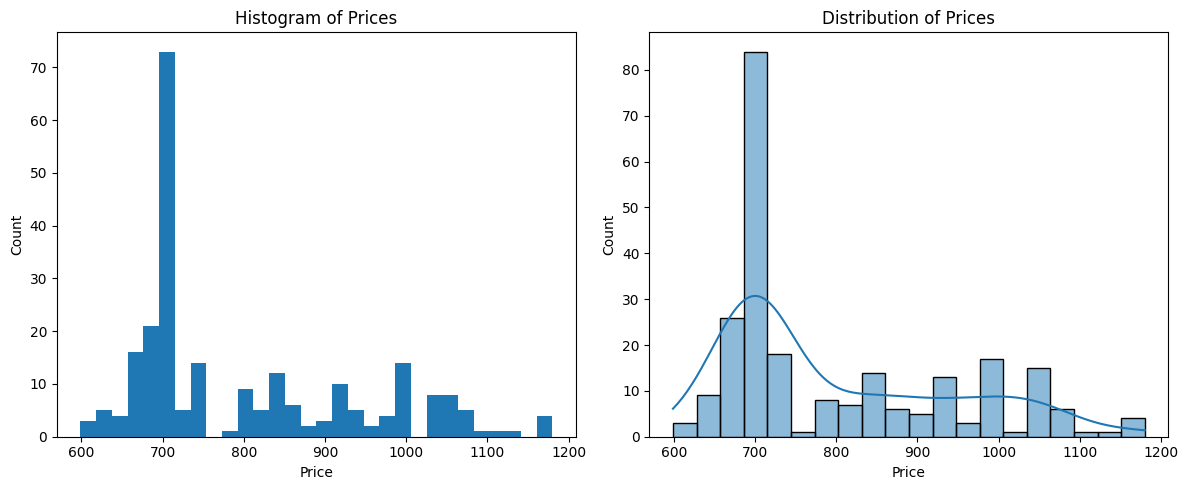

In [82]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Plot 1
plt.sca(axs[0])
plt.hist(data['Price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')

# Plot 2
plt.sca(axs[1])
sns.histplot(data=data, x='Price', bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')

plt.tight_layout()
plt.show()

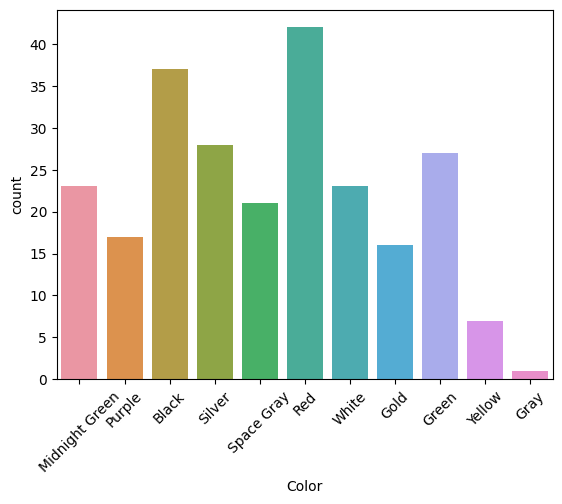

In [83]:
# распределение продуктов по цвету
sns.countplot(x='Color', data=data)
plt.xticks(rotation=45)
plt.show()

Для того, чтобы проанализировать зависимость цены от цвета продукта, можно построить box plot:

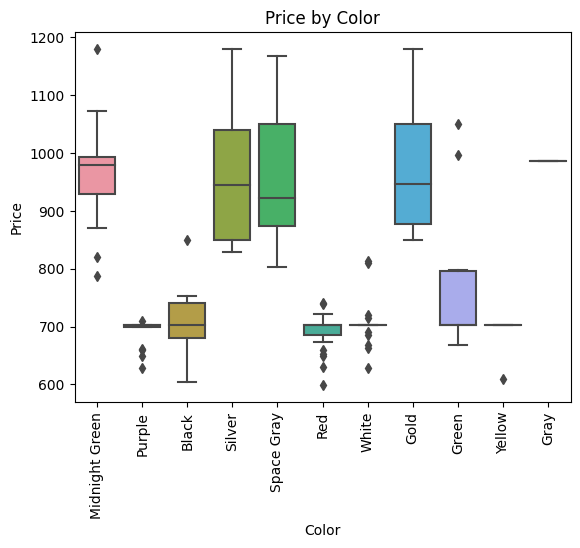

In [84]:
sns.boxplot(data=data, x='Color', y='Price')
plt.title('Price by Color')
plt.xticks(rotation=90)
plt.show()

В образцах Purple, White, Yellow, Gray так произошло, потому что телефоны с такими характеристиками имеют очень маленький разброс в цене в таблице с данными, и их там очень мало (телефонов в других цветах больше, и они имеют больший разброс в количестве гб, а, соответственно, и в цене, поэтому для них и удалось построить привычные ящики.

Одна интересная закономерность, которую можно исследовать, - как меняется цена продукта в зависимости от его цвета и объема памяти. Для этого можно построить heatmap, где по оси x будет объем памяти, по оси y - цвет, а цвет каждой ячейки будет соответствовать цене.

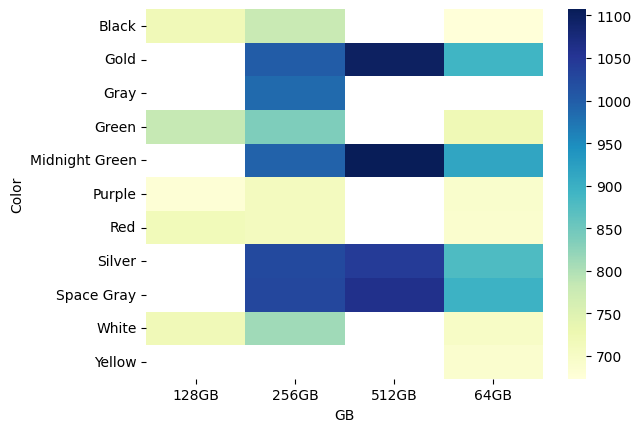

In [85]:
# сводная таблица средней цены по цвету и объему памяти
pivot = pd.pivot_table(data, values='Price', index='Color', columns='GB', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
plt.show()

Еще одна интересная закономерность, которую можно исследовать, - как меняется цена продукта в зависимости от того, является ли он профессиональной или максимальной версией, и какой у него цвет. Для этого можно построить stacked bar chart, где по оси x будет цвет, а высота каждой стопки столбца будет соответствовать количеству продуктов определенного цвета, являющихся профессиональными или максимальными версиями. Размер каждой стопки столбца будет соответствовать общей цене продуктов этого цвета, являющихся профессиональными или максимальными версиями.



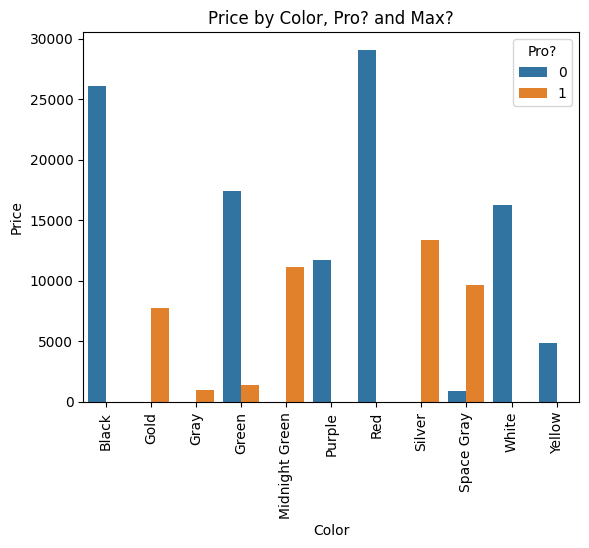

In [86]:
# создание таблицы для stacked bar chart
stacked_data = data.groupby(['Color', 'Pro?', 'Max?']).agg({'Price': 'sum'}).reset_index()

# построение stacked bar chart
sns.barplot(x='Color', y='Price', hue='Pro?', data=stacked_data, errorbar=None)
plt.title('Price by Color, Pro? and Max?')
plt.xticks(rotation=90)
plt.show()

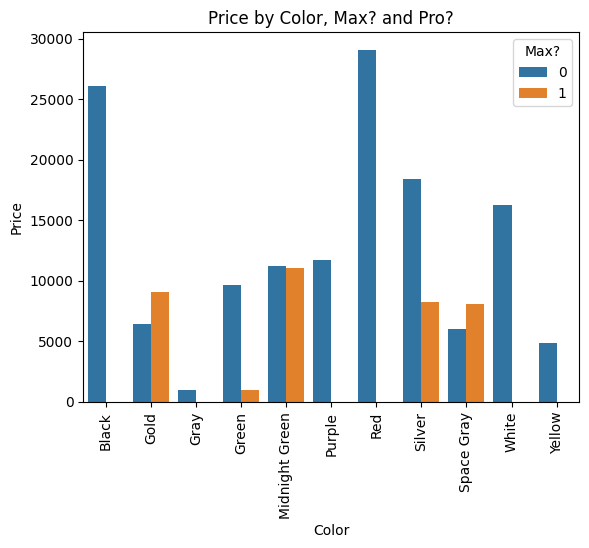

In [87]:
sns.barplot(x='Color', y='Price', hue='Max?', data=stacked_data, errorbar=None)
plt.title('Price by Color, Max? and Pro?')
plt.xticks(rotation=90)
plt.show()

можно построить scatter plot matrix, где на диагонали будет гистограмма распределения цен, а на остальных ячейках - scatter plot, где по оси x будет объем памяти, по оси y - цвет, а цвет точек будет соответствовать тому, является ли продукт профессиональной или максимальной версией. Размер каждой точки будет соответствовать цене продукта.

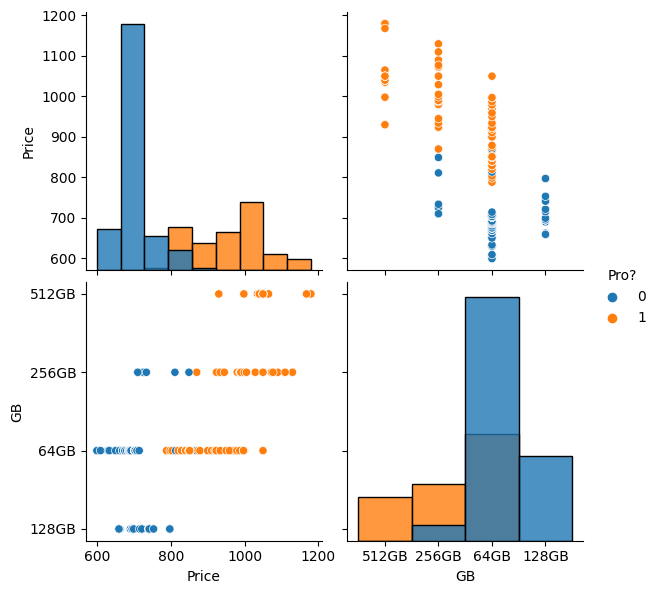

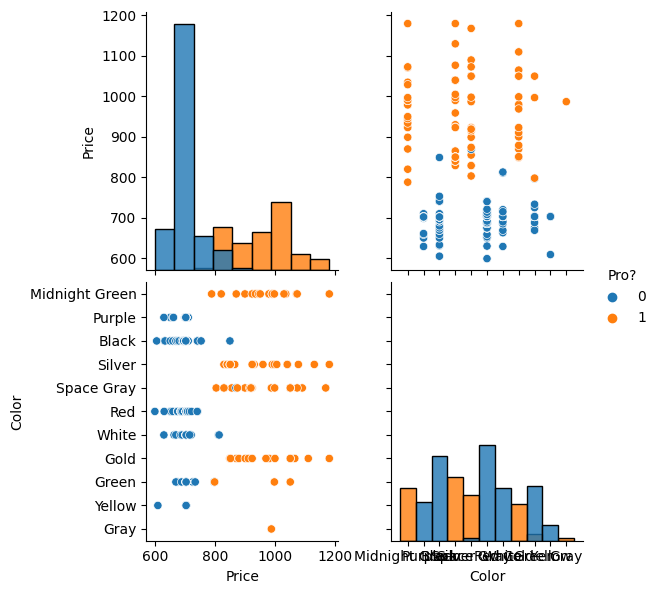

In [88]:
sns.pairplot(data=data, vars=['Price', 'GB'], hue='Pro?', diag_kind='hist', diag_kws={'alpha': 0.8}, height=3)
plt.xticks(rotation=90)
plt.show()

sns.pairplot(data=data, vars=['Price', 'Color'], hue='Pro?', diag_kind='hist', diag_kws={'alpha': 0.8}, height=3)
plt.xticks(rotation=90)
plt.show()


# Шаг 5. Создание новых признаков

Добавим признак "Brand" на основе столбца "Description". 


In [89]:
data['Brand'] = data['Description'].apply(lambda x: x.split()[0])
data.head()

,Description,Pro?,Unlock?,Max?,Color,GB,Price,Brand
0,iPhone 11 Pro Max 512GB - Midnight Green Unlocked,1,1,1,Midnight Green,512GB,1179.99,iPhone
1,iPhone 11 256GB - Purple Unlocked,0,1,0,Purple,256GB,709.99,iPhone
2,iPhone 11 64GB - Black Unlocked,0,1,0,Black,64GB,631.00,iPhone
3,iPhone 11 Pro Max 512GB - Silver Unlocked,1,1,1,Silver,512GB,1179.99,iPhone
4,iPhone 11 Pro 512GB - Silver Unlocked,1,1,0,Silver,512GB,929.97,iPhone


Добавим признак "Price Range" на основе столбца "Price". Для этого можно разбить все продукты на 3 группы по цене: дешевые (менее 700 долларов), средние (от 700 до 1000 долларов) и дорогие (более 1000 долларов).

In [90]:
price_bins = [0, 700, 1000, float('inf')]
price_labels = ['Cheap', 'Medium', 'Expensive']
data['Price Range'] = pd.cut(data['Price'], bins=price_bins, labels=price_labels)
data.head()

,Description,Pro?,Unlock?,Max?,Color,GB,Price,Brand,Price Range
0,iPhone 11 Pro Max 512GB - Midnight Green Unlocked,1,1,1,Midnight Green,512GB,1179.99,iPhone,Expensive
1,iPhone 11 256GB - Purple Unlocked,0,1,0,Purple,256GB,709.99,iPhone,Medium
2,iPhone 11 64GB - Black Unlocked,0,1,0,Black,64GB,631.00,iPhone,Cheap
3,iPhone 11 Pro Max 512GB - Silver Unlocked,1,1,1,Silver,512GB,1179.99,iPhone,Expensive
4,iPhone 11 Pro 512GB - Silver Unlocked,1,1,0,Silver,512GB,929.97,iPhone,Medium


Добавим признак "Color Group" на основе столбца "Color". Для этого можно создать несколько групп цветов на основе их яркости и насыщенности: светлые, темные и яркие.

In [91]:
def color_group(color):
    if color in ['White', 'Silver', 'Gold']:
        return 'Light'
    elif color in ['Black', 'Space', 'Midnight']:
        return 'Dark'
    else:
        return 'Bright'

data['Color Group'] = data['Color'].apply(color_group)

data.head()

,Description,Pro?,Unlock?,Max?,Color,GB,Price,Brand,Price Range,Color Group
0,iPhone 11 Pro Max 512GB - Midnight Green Unlocked,1,1,1,Midnight Green,512GB,1179.99,iPhone,Expensive,Bright
1,iPhone 11 256GB - Purple Unlocked,0,1,0,Purple,256GB,709.99,iPhone,Medium,Bright
2,iPhone 11 64GB - Black Unlocked,0,1,0,Black,64GB,631.00,iPhone,Cheap,Dark
3,iPhone 11 Pro Max 512GB - Silver Unlocked,1,1,1,Silver,512GB,1179.99,iPhone,Expensive,Light
4,iPhone 11 Pro 512GB - Silver Unlocked,1,1,0,Silver,512GB,929.97,iPhone,Medium,Light


# Шаг 6. Гипотезы

Гипотеза: продукты с большим количеством гигабайтов памяти имеют более высокую цену.
Для проверки этой гипотезы построим диаграмму рассеяния "GB" vs "Price" и посмотрим на коэффициент корреляции Пирсона между этими двумя переменными.

* H0: Коэффициент корреляции между количеством ГБ и ценой равен нулю (то есть, количество ГБ не влияет на цену).
* H1: Коэффициент корреляции между количеством ГБ и ценой не равен нулю (то есть, количество ГБ влияет на цену).

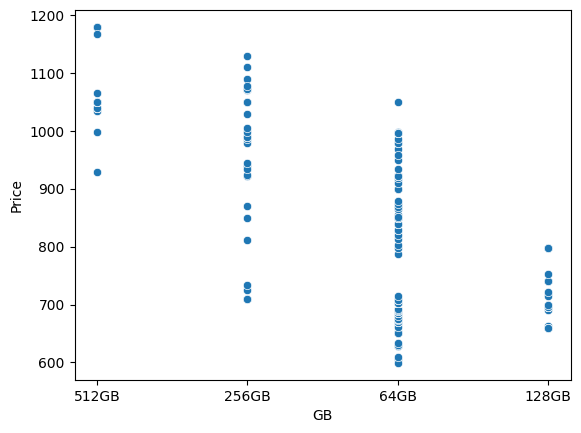

Pearson correlation coefficient: 0.687, p-value: 0.000


In [92]:
import scipy.stats as stats


sns.scatterplot(x='GB', y='Price', data=data)
plt.show()
data['GB'] = data['GB'].apply(lambda x: float(x.rstrip('GB')))
data['GB'] = data['GB'].astype(float)
corr, pvalue = stats.pearsonr(data['GB'], data['Price'])
print(f'Pearson correlation coefficient: {corr:.3f}, p-value: {pvalue:.3f}')


Результат: мы видим, что продукты с большим количеством гигабайтов памяти имеют более высокую цену, что подтверждается положительной корреляцией Пирсона между "GB" и "Price" (коэффициент корреляции 0.687, p-value < 0.001).

Гипотеза: неразблокированные продукты имеют более низкую цену, чем продукты, которые разблокированы.
Для проверки этой гипотезы построим ящик с усами "Unlock Type" vs "Price" и посмотрим на средние значения цены для каждого типа разблокировки.

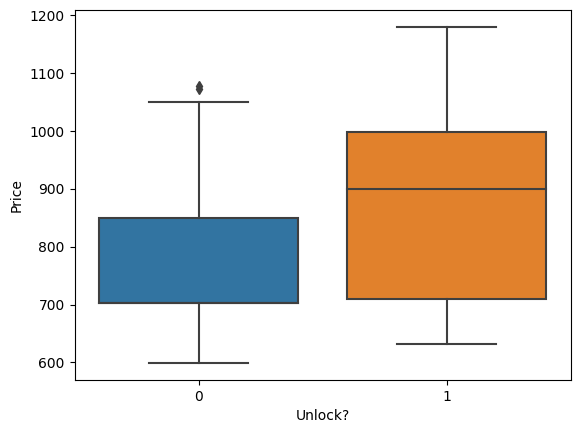

Unlock?
0    776.965080
1    880.265455
Name: Price, dtype: float64


In [93]:
sns.boxplot(x='Unlock?', y='Price', data=data)
plt.show()

unlock_price = data.groupby('Unlock?')['Price'].mean()
print(unlock_price)


Результат: мы видим, что разблокированные продукты имеют более высокую цену

Гипотеза о различии цен между разными цветами iPhone. Мы можем проверить, есть ли статистически значимые различия в ценах между разными цветами iPhone. Для этого мы можем использовать однофакторный дисперсионный анализ (ANOVA). Гипотезы:

* H0: Средние цены на iPhone одинаковы для всех цветов.
* H1: Средние цены на iPhone различаются для как минимум двух цветов.

Для проверки данной гипотезы мы можем использовать однофакторный дисперсионный анализ (ANOVA). ANOVA позволяет определить, есть ли статистически значимые различия между средними значениями нескольких групп. В данном случае мы будем рассматривать цвета iPhone как группы.

Для начала мы можем построить boxplot для каждого цвета iPhone, чтобы визуально оценить распределение цен и возможные выбросы в каждой группе. Далее мы можем применить ANOVA и посмотреть, есть ли статистически значимые различия в ценах между группами. Если средние значения различаются, мы можем применить дополнительные тесты (например, t-тесты) для определения между какими конкретно группами существуют различия.

In [94]:
from scipy.stats import f_oneway

red_prices = data[data['Color'] == 'Red']['Price']
black_prices = data[data['Color'] == 'Black']['Price']
purple_prices = data[data['Color'] == 'Purple']['Price']
midnight_green_prices = data[data['Color'] == 'Midnight Green']['Price']
silver_prices = data[data['Color'] == 'Silver']['Price']
space_gray_prices = data[data['Color'] == 'Space Gray']['Price']

fvalue, pvalue = f_oneway(red_prices, black_prices, purple_prices, midnight_green_prices, silver_prices, space_gray_prices)

print(f'F-value: {fvalue:.3f}, p-value: {pvalue:.3f}')


F-value: 122.975, p-value: 0.000


Так как p-value меньше уровня значимости (0.05), мы можем отвергнуть нулевую гипотезу и сделать вывод о том, что существуют статистически значимые различия между ценами на iPhone разных цветов.

# Шаг 7. Машинное обучение

Для машинного обучения мы можем поставить задачу предсказания цены iPhone на основе других признаков, таких как количество ГБ, цвет, модель (Pro или обычная версия, Maх или обычная версия) и Lock/Unlock.

Для начала мы можем преобразовать категориальные признаки (цвет и модель) в числовые с помощью one-hot encoding. Затем мы можем разделить данные на обучающую и тестовую выборки, и обучить несколько моделей на обучающей выборке.

В качестве метрики качества моделей мы можем использовать коэффициент детерминации R2. Чем ближе коэффициент детерминации к единице, тем лучше модель.

Например, мы можем использовать линейную регрессию и случайный лес для предсказания цены. Для линейной регрессии мы можем использовать класс LinearRegression из библиотеки scikit-learn:

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# преобразуем категориальные признаки в числовые с помощью one-hot encoding
data = pd.get_dummies(data, columns=['Color', 'Pro?'])
data = data.drop(['Description', 'Brand', 'Price Range', 'Color Group'], axis=1)

# разделяем данные на обучающую и тестовую выборки
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# обучаем линейную регрессию
model = LinearRegression()
model.fit(train_data.drop('Price', axis=1), train_data['Price'])

# делаем предсказания на тестовой выборке
y_pred = model.predict(test_data.drop('Price', axis=1))

# вычисляем коэффициент детерминации
r2 = r2_score(test_data['Price'], y_pred)
print(f'R2 score: {r2:.3f}')


R2 score: 0.865


Аналогично мы можем обучить случайный лес с помощью класса RandomForestRegressor:

In [97]:
from sklearn.ensemble import RandomForestRegressor

# обучаем случайный лес
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_data.drop('Price', axis=1), train_data['Price'])

# делаем предсказания на тестовой выборке
y_pred = model.predict(test_data.drop('Price', axis=1))

# вычисляем коэффициент детерминации
r2 = r2_score(test_data['Price'], y_pred)
print(f'R2 score: {r2:.3f}')


R2 score: 0.857


In [101]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}

for name, model in models.items():
    # обучаем модель
    model.fit(train_data.drop('Price', axis=1), train_data['Price'])
    
    # делаем предсказания на тестовой выборке
    y_pred = model.predict(test_data.drop('Price', axis=1))
    
    # вычисляем коэффициент детерминации
    r2 = r2_score(test_data['Price'], y_pred)
    print(f'{name}: R2 score = {r2:.3f}')

Linear Regression: R2 score = 0.865
Random Forest: R2 score = 0.857
Gradient Boosting: R2 score = 0.872


лучшая модель получается Gradient Boosting: R2 score = 0.872

Так же можем решить задачу классификации, предсказать модель является ли макс версией или нет

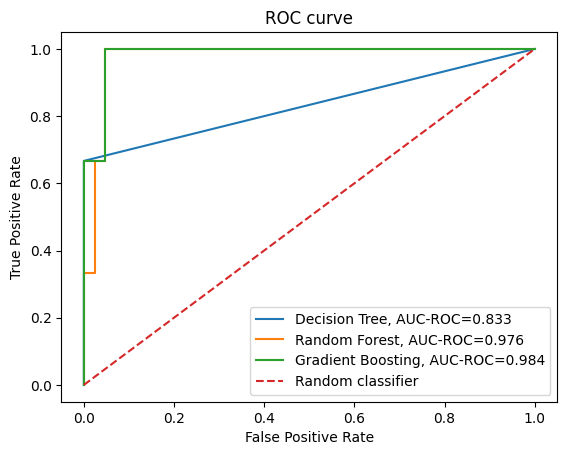

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}


for name, model in models.items():
    # обучаем модель
    model.fit(train_data.drop('Max?', axis=1), train_data['Max?'])
    
    # делаем предсказания на тестовой выборке
    y_pred_proba = model.predict_proba(test_data.drop('Max?', axis=1))[:, 1]
    
    # вычисляем FPR и TPR для разных порогов
    fpr, tpr, thresholds = roc_curve(test_data['Max?'], y_pred_proba)
    
    # вычисляем AUC-ROC
    auc = roc_auc_score(test_data['Max?'], y_pred_proba)
    
    # строим график ROC-кривой
    plt.plot(fpr, tpr, label=f'{name}, AUC-ROC={auc:.3f}')
    
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score

for name, model in models.items():
    # обучаем модель
    model.fit(train_data.drop('Max?', axis=1), train_data['Max?'])
    
    # делаем предсказания на тестовой выборке
    y_pred = model.predict(test_data.drop('Max?', axis=1))
    
    # вычисляем матрицу ошибок и accuracy
    tn, fp, fn, tp = confusion_matrix(test_data['Max?'], y_pred).ravel()
    accuracy = accuracy_score(test_data['Max?'], y_pred)
    
    # выводим результаты
    print(f'{name}:')
    print(f'Confusion matrix:\n{confusion_matrix(test_data["Max?"], y_pred)}')
    print(f'Accuracy: {accuracy:.3f}\n')


Decision Tree:
Confusion matrix:
[[42  0]
 [ 2  4]]
Accuracy: 0.958

Random Forest:
Confusion matrix:
[[40  2]
 [ 2  4]]
Accuracy: 0.917

Gradient Boosting:
Confusion matrix:
[[40  2]
 [ 1  5]]
Accuracy: 0.938

